In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - Overview of Supervised Learning

## 2.1 - 2.2 Introduction, Variables Types and Terminology

**Supervised learning** is the practice of using input values to predict output values. For each observation, there is a corresponding target value. Using our observations we can learn patterns of how various input features change in relation to the output. The output is a numerical measurement where each value is either larger, smaller, or equal to another (i.e. there is explicit ordering to the output). 

#### Terminology
* Predicting quantitative output: regression
* Predicting qualitative (class) output: classification
* Variable types: quantitative (1,3.3,7), qualitative("red","green","blue"), ordered qualitative (e.g. "small", "medium", "large")

#### Ways to represent qualitative data
* 0/1 or -1/1
* "Binary" or "dummy" variables
* N qualitative values to a variables => N different binary dummy variables

## 2.3 Two Simple Approaches to Prediciton: Least Squares and Nearest Neighbors

Two simple but powerful methods for prediction: least squares (a linear best fit model) and nearest neighbors. The former makes heavy assumptions about the structure of the data, while the latter makes none.

### Linear Models and Least Squares

The linear model has been a mainstay of statistics for the past several decades and remains one of its most important tools. Given a vectors of inputs $X^T = (X_1, X_2, ... X_p),$ the output $Y$ is predicted via the model

$$ \hat{Y} = \hat{\beta}_0 + \sum_{j=1}^p X_{j}\hat{\beta}_j .$$

The term $\hat{\beta}_0$ is the intercept, also referred to as the **bias**. It is sometimes convenient to include the constant variable 1 in matrix $X$ so that the intercept term can be included in the matrix of coefficients $\hat{\beta}.$ When this is done, the linear model can be written as an inner product

$$ \hat{Y} = X^{T}\hat{\beta}. $$

In this case, $X^T$ is the trainspose of the matrix of our features, $\hat{Y}$ is a vector with one entry per observation on the data set, and $\hat{\beta}$ is a p x 1 vector of coefficients. 

The most popular way to fit this model is to do so by **least squares**. That is, to locate the set of coefficients $\beta$ that minimize the sum of squared residuals ("residual sum of squares", or **RSS**)

$$ RSS(\beta) = \sum_{1}^n (y_i - \hat{y}_i)^2.$$

Characterized in matrix notation, this becomes

$$ RSS(\beta) = (y - X\beta)^T (y - X\beta).$$

Differentiating w.r.t. \beta gives the normal equations 

$$ X^T (y - X\beta) = 0. $$

If $X^T X$ is nonsingular, we get the unique solution

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}y.$$

### Example: solving OLS "by hand" (by numpy)

Beta: [[ 293.28437125]
 [   8.71021975]]


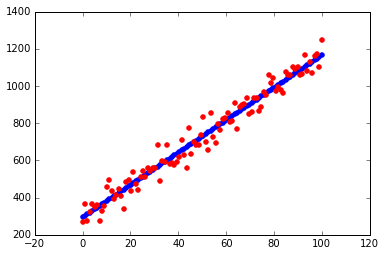

In [126]:
# matrix X will range 0 to 100 with an added bias column of all ones
X = np.linspace(0,100,100)
x_beta = np.linspace(1,1,100)
X = np.concatenate(([x_beta],[X]),axis=0).T # add the bias column to X

# Y will be the true function of 8.6x + 300, with added gaussian noise
y = np.matrix(300 + 8.6*X[:,1]).T + np.matrix(np.random.normal(0,50,100)).T 

# solve for beta
beta = np.dot(np.linalg.pinv(np.dot(X.T,X)), np.dot(X.T,y))
print("Beta: {}".format(beta))

#make predictions
yhat = np.dot(X,beta)

plt.scatter(np.asarray(X[:,1]),np.asarray(yhat),color='blue')
plt.scatter(np.asarray(X[:,1]),np.asarray(y),color='red');

The "true" intercept and slope are 300 and 8.6. Least squares comes pretty close!

### Nearest-Neighbor Methods

Nearest neighbors methods use the training observations closest to $x_i$ in order to form $\hat{y}_i.$ The **K-Nearest  Neighbors (KNN)** model is defined as 

$$ \hat{Y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i,$$

where $N_k(x)$ is the neighborhood of $x$ defined by its $k$ closest points by some measure of distance. Euclidean distance works fine as a simple and interpretable metric, but in higher dimensions other metrics may become desirable. The model, then, is simply the average of the target values associated with each point's $k$ nearest observations.

Intuitively, within sample, decreasing the value of K will improve the accuracy of the model. In the extreme case, k=1 provides perfect overfitting where y is always set equal to itself. Out of sample, however, this would clearly lead to overfitting. It is necessary, then, to test various values of K to see which best balances model accuracy and out of sample generalization. 

### 2.4 Statistical Decision Theory

Given that:

* $ X \in \mathbb{R}^p $ (X a real valued input vector)
* $ Y \in \mathbb{R} $ (Y a real valued output vector)
* X and Y have joint ditribution $ Pr(X,Y) $

Our goal is to find a function $f(X)$ for predicting $Y$ given the values of input $X$.

This theory requires a loss function $L(Y,f(X))$ to tell us how close to the true $Y$ our predicted output $\hat{Y}$ is and to penalize prediction errors. The most common such function os the **squared error loss**: $L(Y,f(X)) = (Y-f(X))^2.$ 

Our goal, then, is to find the function $f(X)$ that minimizes the expected prediction error (EPE). In this case is the conditional expectation of $Y$ given $X$

$$ f(X) = E(Y | X = x), $$

also known as the **regression function**.

The best prediction of $Y$ at any point $X=x$, then, when determining "best" by mean squared error, is the conditional average.

**Nearest Neighbors** methods can be seen as an attempt to directly implement this with the training data, taking the average of all $y_i$ points in the neighborhood of each $x_i,$ written as:

$$ \hat{f(X)} = \text{Ave}(y_i | x_i \in N_{k}(X)), $$

where $N_{k}(X)$ is still the neighborhood of k points closest to $x_i$ by some similarity measure. Two approximations are happening here:

* Expectation is approximated by averaging over sample data
* Conditioning at a point is relaxed to conditioning on some region "close enough" to a target point.

Some important properties of this:

* As $ N \to \infty, \text{ } L(Y,f(X))$ decreases 
* As $ k $ increases, the stability of the estimator improves
* As $ k,N \to \infty \text{ } s.t. \frac{k}{N} \to 0, \text{ } \hat{f}(X) \to E(Y|X=x) $

This last property is certainly exciting, but keep in mind that our datasets are never infinitely large, and therefore this is of course not a perfect estimator. In fact, linear or otherwise more-structured models will often prove to be more stable estimators than k-nearest neighbors. KNN also has the problem that its instability worsens as the dimensionality $p$ increases, which proves problematic in many real-world applications. 

### Example: solving KNN "by hand" (by numpy)

In [ ]:
# code here

 (continue here later with the section connecting the two methods)

 ### 2.5 Local Methods in High Dimensions

### 2.6 Statistical Models, Supervised Learning, and Function Approximation